In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

In [2]:
athlete_df = pd.read_csv('/Users/meetsudra/Documents/GitHub/olympics_dataanalysis/athlete_events.csv')
region_df = pd.read_csv('/Users/meetsudra/Documents/GitHub/olympics_dataanalysis/noc_regions.csv')

In [3]:
athlete_df.shape

(271116, 15)

### setting up the dataset to see it on the webpage

In [4]:
athlete_df = athlete_df[athlete_df['Season'] == 'Summer']

In [5]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df = athlete_df.merge(region_df,on='NOC',how='left')
# we want region name of each player thus applying left join

In [7]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [8]:
df['region'].unique().shape # total countries participated so far

(206,)

In [9]:
# checking missing and duplicate values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [10]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Medal_tally

### Getting data ready for medal-tally option

In [11]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [12]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1) # one-hot encoding 
df.shape

(221167, 20)

In [13]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [14]:
medal_tally = medal_tally.groupby('region').sum()[["Gold","Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()

# problem : here data is not exactly matching with real world data. there is a slight variation this might be due to the exception listed in the wikipedia document below accurate result tables.

In [15]:
medal_tally['total'] = medal_tally["Gold"] + medal_tally["Silver"] + medal_tally["Bronze"]
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


### Sidebar drop downs in Medal-tally section

In [16]:
# which year olympics was played
years = df['Year'].unique().tolist()
years.sort()


In [17]:
years.insert(0,'overall')
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [18]:
country = np.unique(df['region'].dropna().values).tolist()

In [19]:
country.insert(0,'overall')

### Year and country wise selection 

In [20]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [21]:
# function to make dropdowns work

def fetch_medal_tally(year, country):

    flag = 0   # by-default flag
    if year == 'overall' and country == 'overall':
        temp_df = medal_df

    if year == 'overall' and country != 'overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]

    if year != 'overall' and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]

    if year != 'overall' and country != 'overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=True).reset_index()
    else :
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)


In [22]:
fetch_medal_tally(year='1900', country='Albania')

Empty DataFrame
Columns: [region, Gold, Silver, Bronze, total]
Index: []


# Overall Analysis

- No. of editions 
- No. of cities
- No. of events/sports
- No. of athletes
- participating nations 

Below statistics are the equal width columns of overall analysis option on our application

In [23]:
# No of editions 
df['Year'].unique().shape[0] - 1

# 1906 olympics is not considered. thus official number is 28.

28

In [24]:
# No of cities 
df['City'].unique().shape


(23,)

In [25]:
# No of Sports 
df['Sport'].unique().shape


(52,)

In [27]:
# No of events
df['Event'].unique().shape


(651,)

In [27]:
# No of Players
df['Name'].unique().shape


(116122,)

In [28]:
# No of regions
df['region'].unique().shape


(206,)

Over the years, what was the number of participating nations every year

In [29]:
df.head()
df.shape

(221167, 20)

In [38]:
nations_over_time  = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition','count':'No. of Countries'},inplace=True)

In [ ]:

fig = px.line(nations_over_time, x='Edition', y='No. of Countries')
fig.show()


over the years event kitne hue 

In [40]:
Events_over_time  = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')
Events_over_time.rename(columns={'Year':'Edition','count':'No. of Events'},inplace=True)

In [42]:
fig = px.line(Events_over_time, x='Edition', y='No. of Events')
fig.show()


heatmap showcasing events of each sport over the years, where we will get to know 
- popular events
- and when did it debut in olympics

In [51]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [52]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

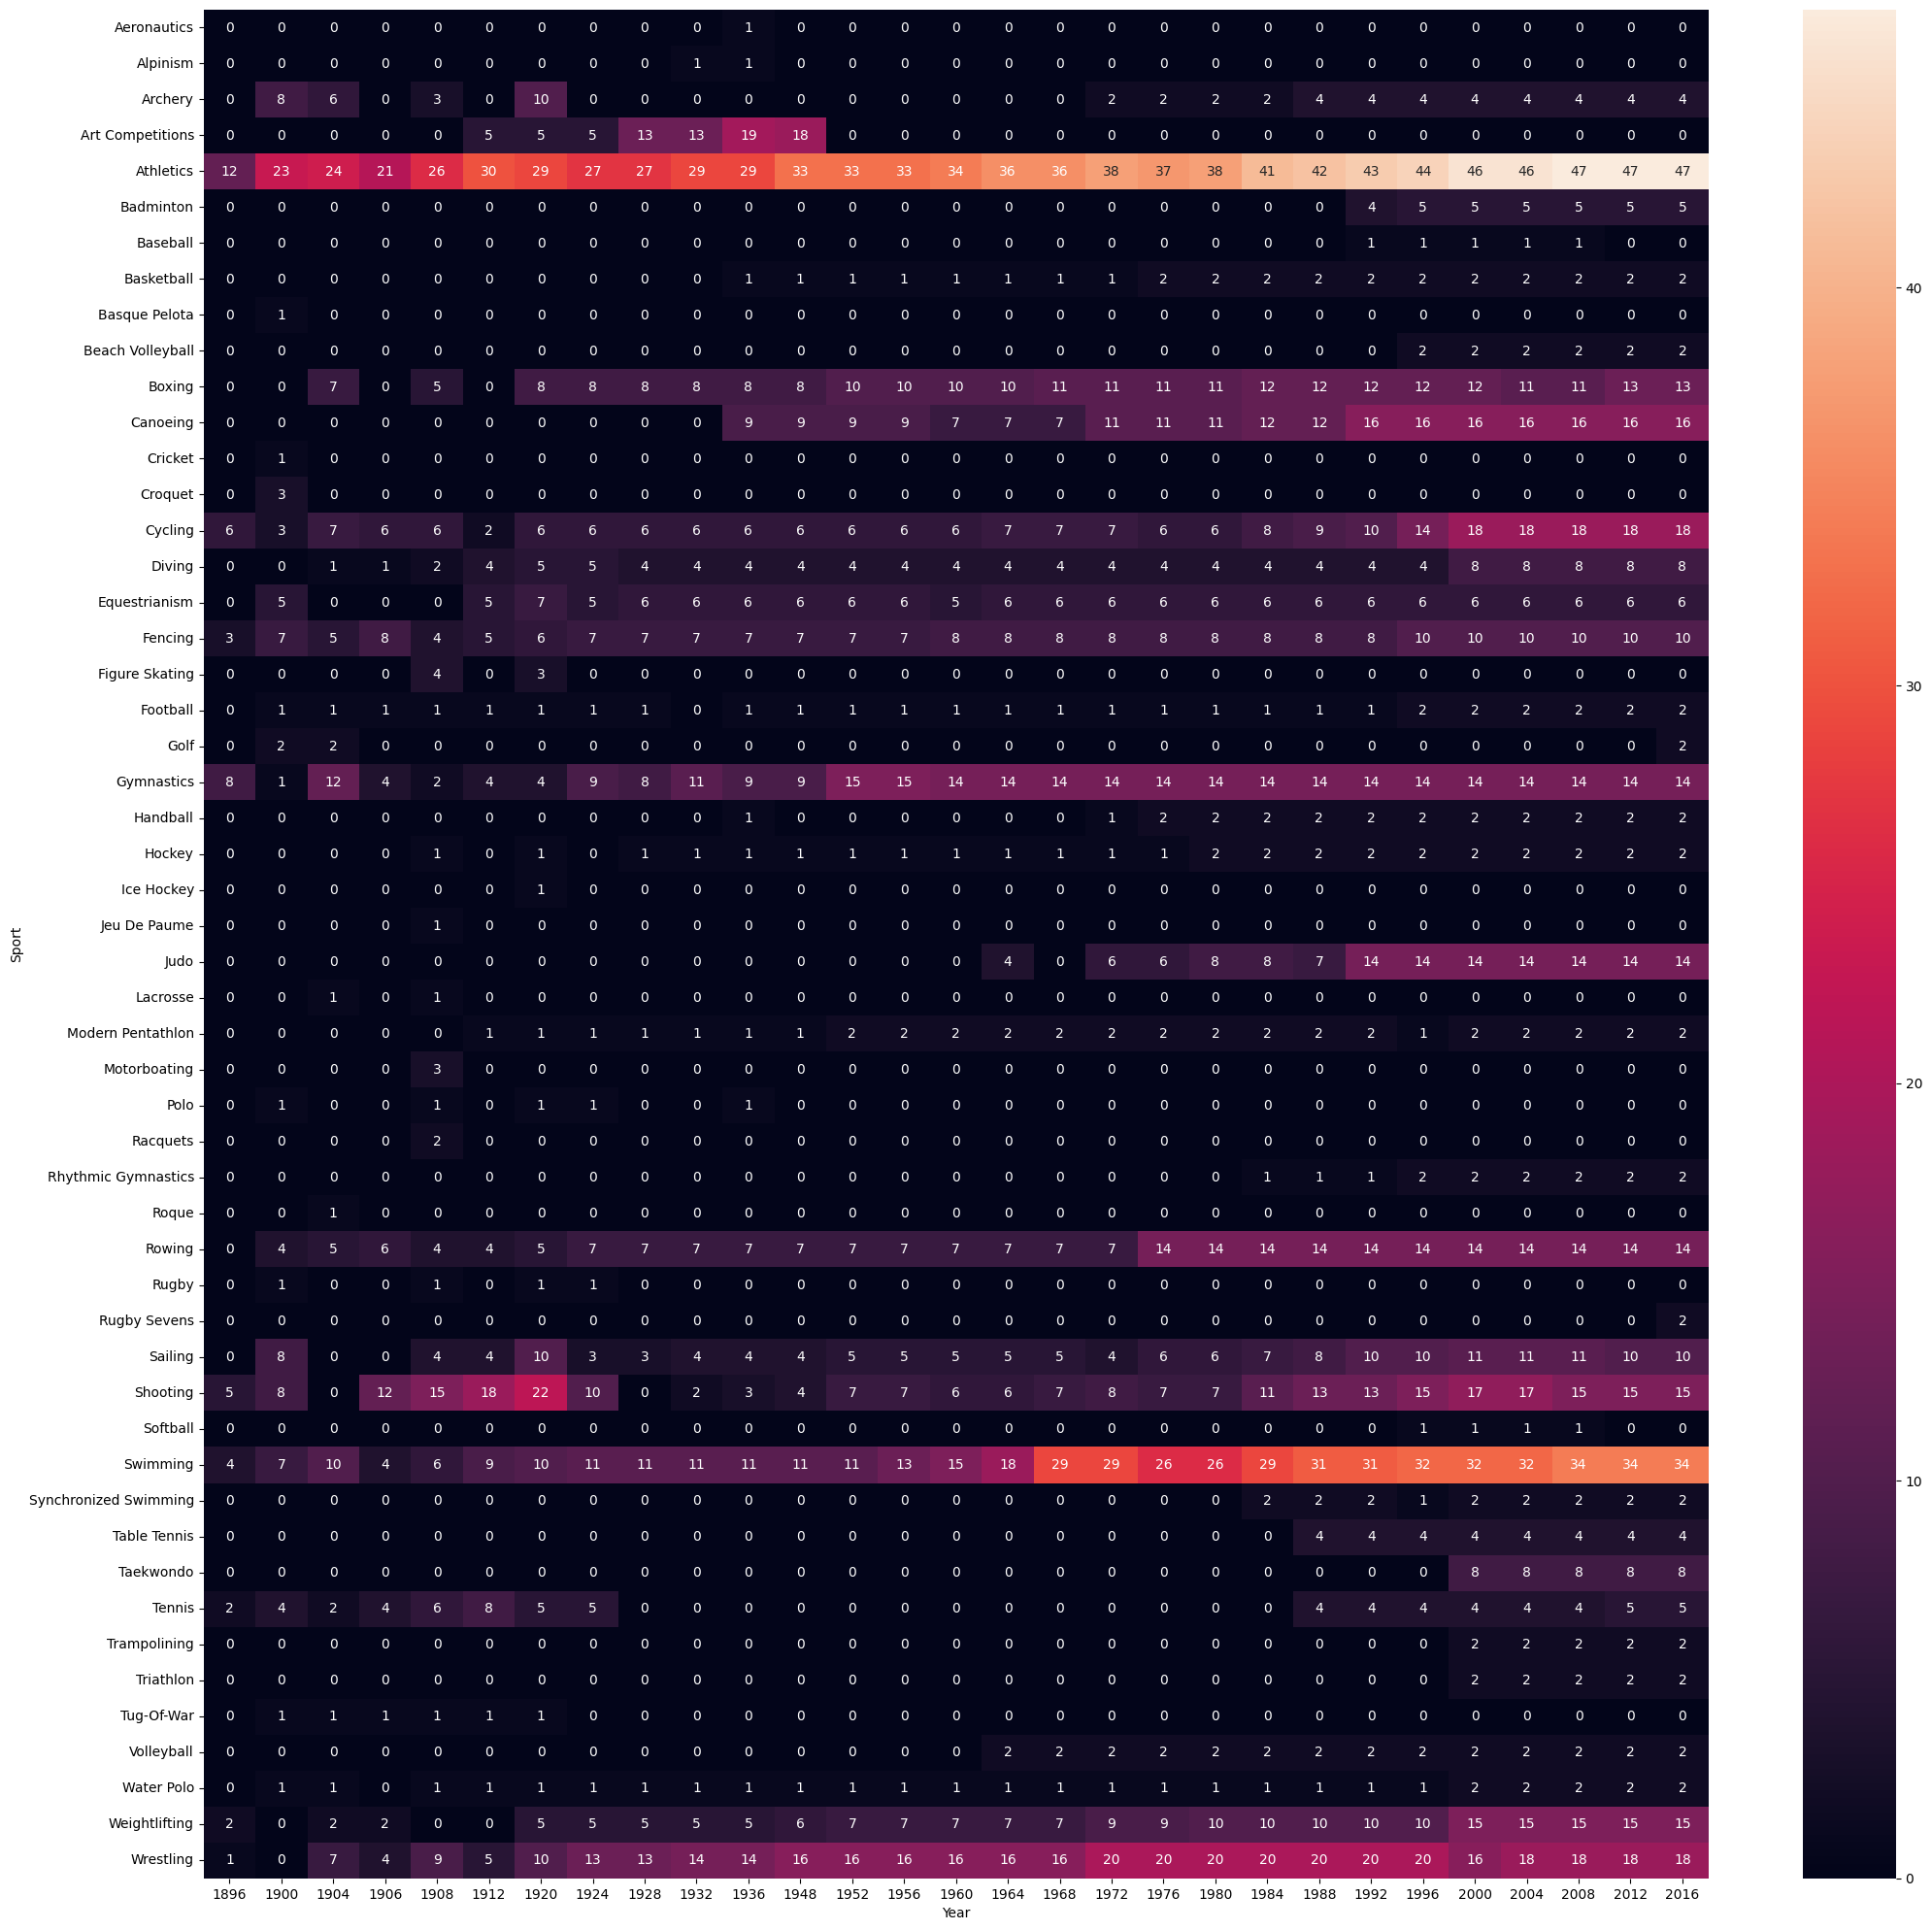

In [54]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

Who all are highly decorated athletes in olympics?

In [111]:
def most_successful(df,Sport):
    temp_df = df.dropna(subset=['Medal'])

    if Sport != 'overall':
        temp_df = temp_df[temp_df['Sport'] == Sport]

    x = temp_df['Name'].value_counts().reset_index().merge(df,left_on='Name',right_on='Name', how='left')[['Name','Sport','region','count']].drop_duplicates('Name')
    x = x.rename(columns={'count':'Medals'})
    return x

    


In [112]:
most_successful(df,'overall')

,Name,Sport,region,Medals
0,"Michael Fred Phelps, II",Swimming,USA,28
30,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,18
49,Nikolay Yefimovich Andrianov,Gymnastics,Russia,15
73,Borys Anfiyanovych Shakhlin,Gymnastics,Russia,13
97,Takashi Ono,Gymnastics,Japan,13
...,...,...,...,...
63079,Joel Isasi Gonzlez,Athletics,Cuba,1
63081,Florena Andreea Isrescu,Gymnastics,Romania,1
63085,Ryoji Isaoka,Weightlifting,Japan,1
63088,Preben Isaksson,Cycling,Denmark,1


# Country-Wise analysis
- Countrywise medal tally per year(line plot)
- What countries are good at heatmap 
- Most successful Athletes (top 10)

In [114]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_5213/3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df

if user_menu == 'Country-wise Analysis':
    helper.yearwise_country_medaltally(df,'USA')
    

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [119]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()